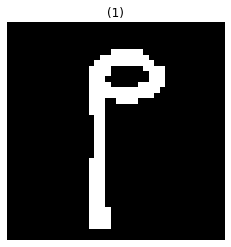

In [35]:
from commonfunctions import *
import skimage as sk
import numpy as np
import matplotlib as mp
import scipy as sp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os


img = io.imread(r"dataset_mixed/33/33-4.jpg",as_gray=True)
img = (img <= sk.filters.threshold_otsu(img)).astype(int)
show_images([img])
# plt.imsave("x1.png",img[150:260,760:826],cmap='gray')